<a href="https://colab.research.google.com/github/Koyelisha/Machine-Learning/blob/main/Used_car_prediction_incomplete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score

In [4]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [5]:
df = pd.read_csv('/content/Car_Raw_Data.csv')
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [6]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [7]:
df.drop('Model',axis=1,inplace=True)
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [8]:
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [10]:
#Removing the missing datas
df.dropna(axis=0,inplace=True)
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


Probability Distribution of Car price

Text(0.5, 1.0, 'Car Price Distribution')

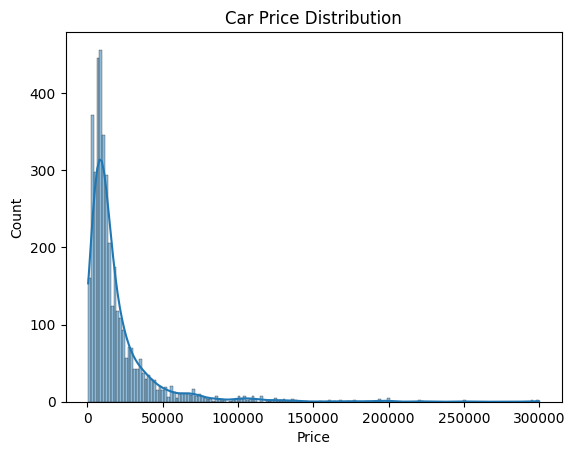

In [16]:
sns.histplot(df['Price'],kde=True)
plt.title('Car Price Distribution')

In [18]:
q = df['Price'].quantile(0.99)
q

129812.51999999981

In [20]:
car_1 = df[df['Price']<q]
car_1.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


Text(0.5, 1.0, 'Before removing the outliers')

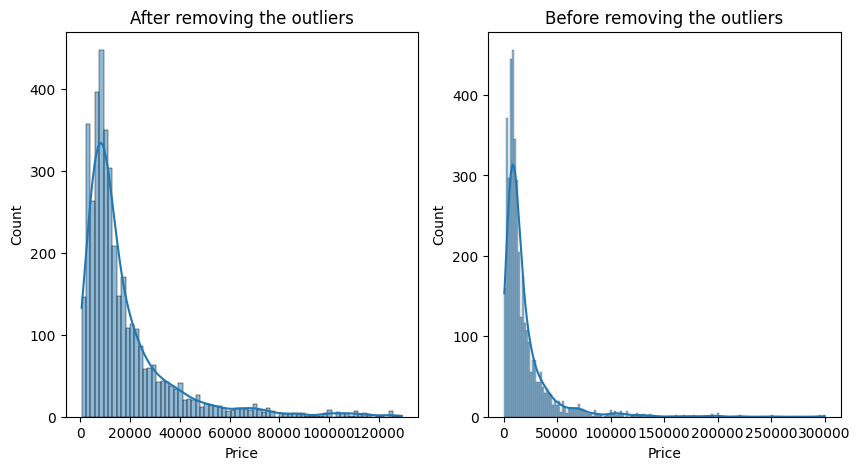

In [23]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(car_1['Price'],kde=True)
plt.title('After removing the outliers')

plt.subplot(1,2,2)
sns.histplot(df['Price'],kde=True)
plt.title('Before removing the outliers')

**The similar issue we have with other columns like Mileage,EngineV and Year**

<Axes: xlabel='Year', ylabel='Count'>

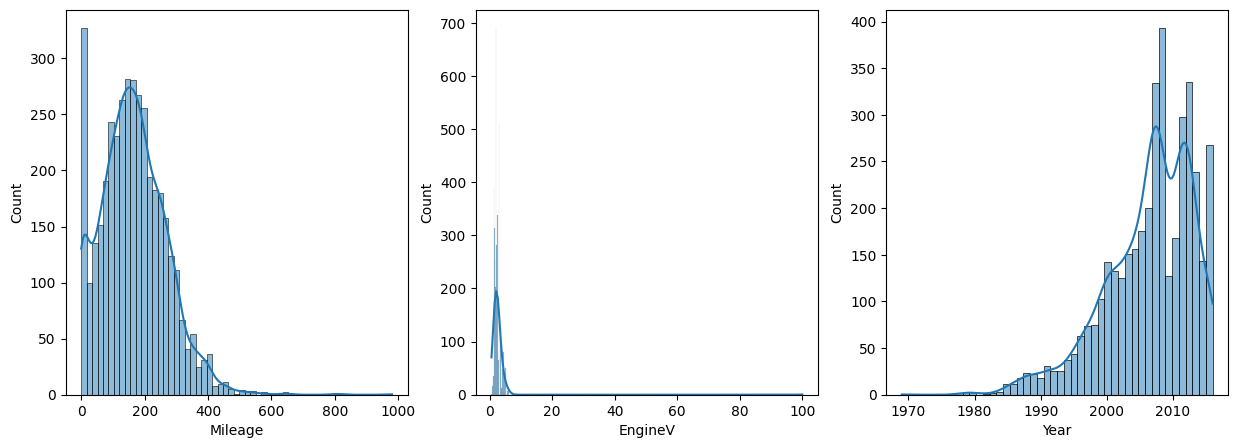

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(car_1['Mileage'],kde=True)

plt.subplot(1,3,2)
sns.histplot(car_1['EngineV'],kde=True)

plt.subplot(1,3,3)
sns.histplot(car_1['Year'],kde=True)

In [30]:
#Cleaning the outliers from the Mileage column
q1 = car_1['Mileage'].quantile(0.99)
car_2 = car_1[car_1['Mileage']<q1]

Text(0.5, 1.0, 'Before removing the outliers')

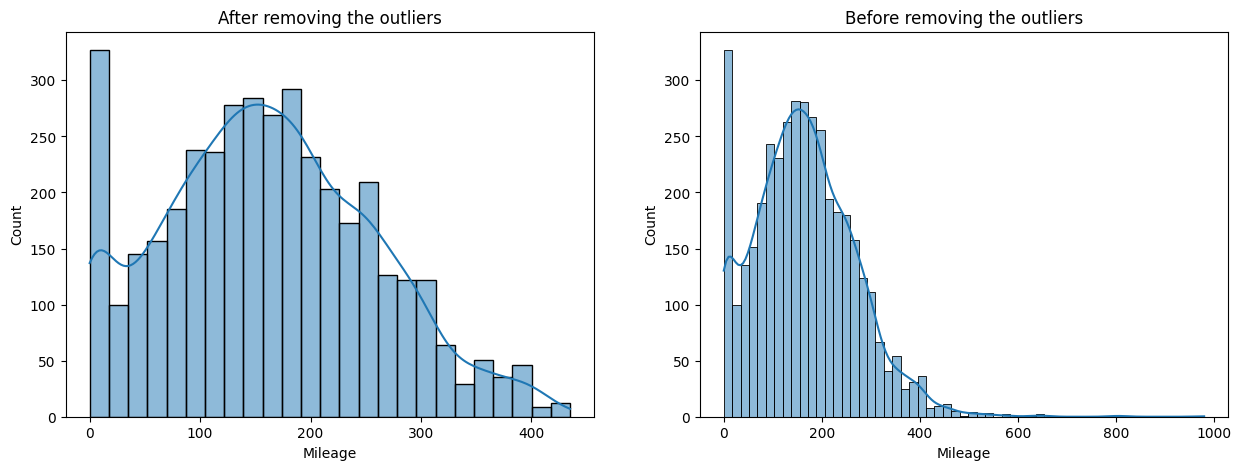

In [33]:
#Comparing the datas of Mileage
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(car_2['Mileage'],kde=True)
plt.title('After removing the outliers')

plt.subplot(1,2,2)
sns.histplot(car_1['Mileage'],kde=True)
plt.title('Before removing the outliers')

In [38]:
#Cleaning the outliers from the EngineV column
q2 = car_1['EngineV'].quantile(0.99)
car_3 = car_2[car_2['EngineV']<6.5]
car_3.describe()

,Price,Mileage,EngineV,Year
count,3921.000000,3921.000000,3921.000000,3921.000000
mean,17988.421311,161.279776,2.443497,2006.406019
std,19041.658686,96.068269,0.946198,6.595871
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2008.000000
75%,21500.000000,229.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


Text(0.5, 1.0, 'Before removing the outliers')

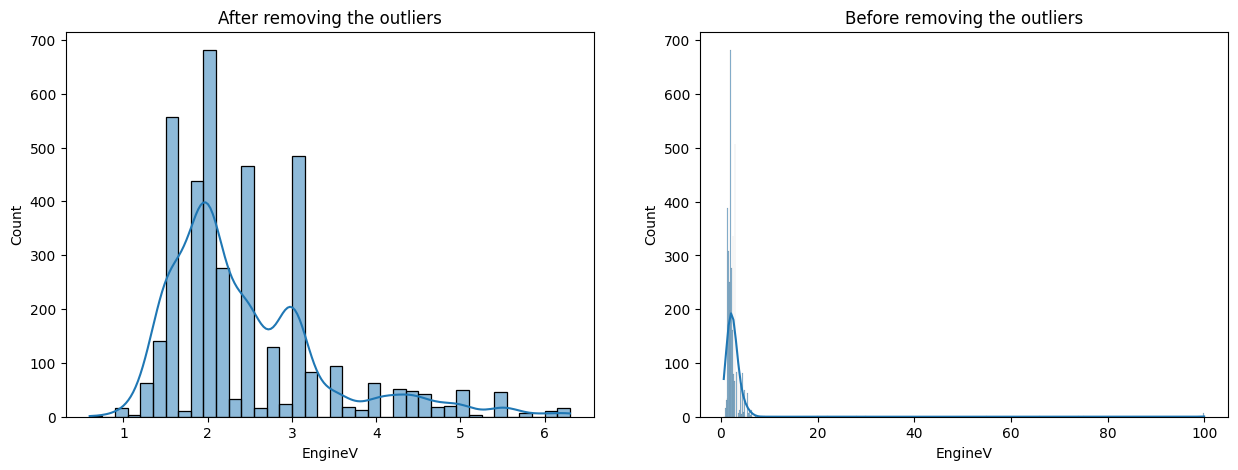

In [39]:
#Comparing the datas of EngineV
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(car_3['EngineV'],kde=True)
plt.title('After removing the outliers')

plt.subplot(1,2,2)
sns.histplot(car_2['EngineV'],kde=True)
plt.title('Before removing the outliers')

In [52]:
#Cleaning the outliers from the Year column
q3 = car_3['Year'].quantile(0.01)
q3
car_4 = car_3[car_3['Year']>q3]
car_4.describe()

,Price,Mileage,EngineV,Year
count,3867.000000,3867.000000,3867.000000,3867.000000
mean,18194.455679,160.542539,2.450440,2006.709853
std,19085.855165,95.633291,0.949366,6.103870
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


Text(0.5, 1.0, 'Before removing the outliers')

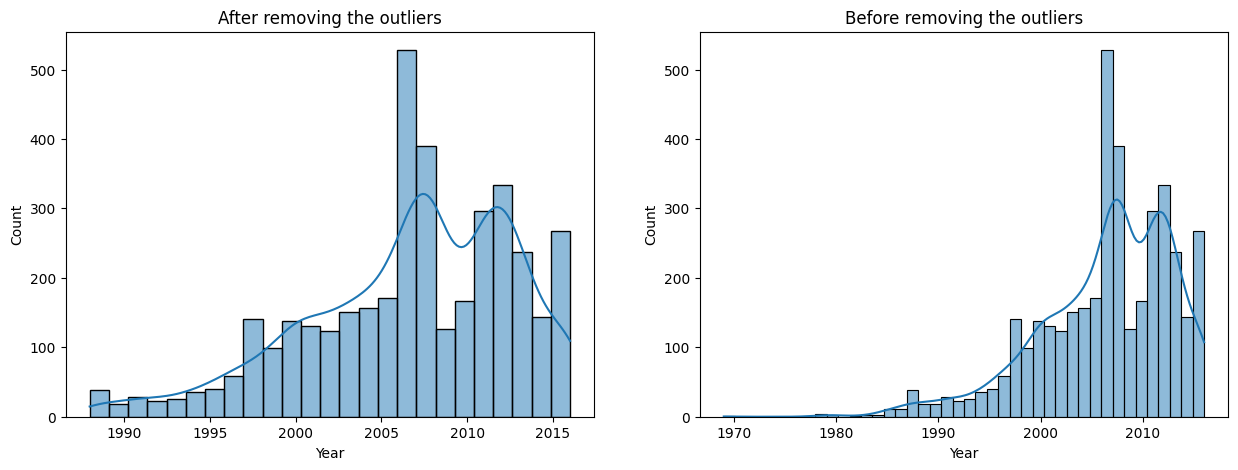

In [56]:
#Comparing the datas of Year
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(car_4['Year'],kde=True)
plt.title('After removing the outliers')

plt.subplot(1,2,2)
sns.histplot(car_3['Year'],kde=True)
plt.title('Before removing the outliers')

In [57]:
car_4

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


In [58]:
df.shape[0] - car_4.shape[0]

158

In [59]:
car_4.to_csv('Cleaned_car_data.csv',index=False)
print('Data Saved')

Data Saved


In [61]:
clean_data = car_4.copy()
clean_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


Text(0.5, 1.0, 'EngineV vs Price')

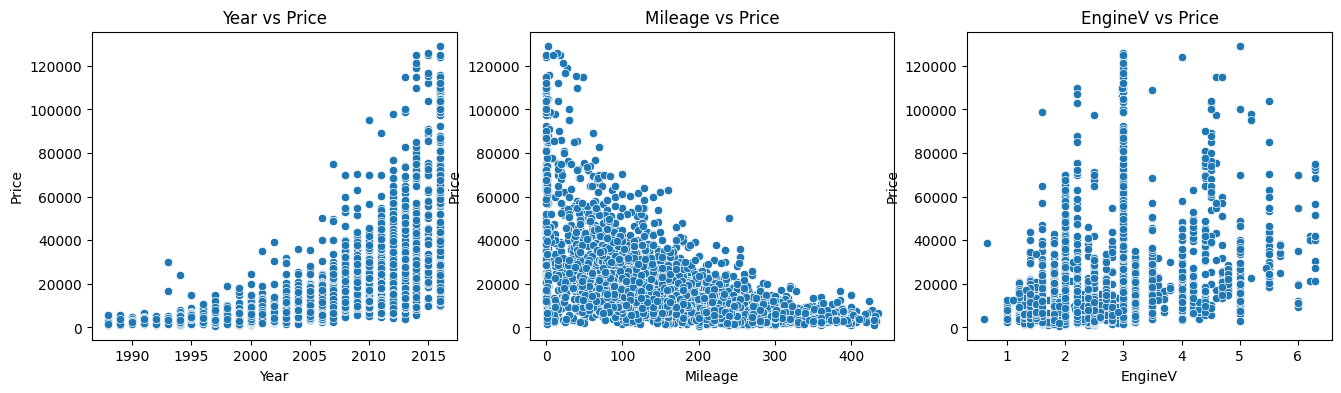

In [67]:
#Plotting all the three numerical columns
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.scatterplot(x=clean_data['Year'],y=clean_data['Price'])
plt.title('Year vs Price')

plt.subplot(1,3,2)
sns.scatterplot(x=clean_data['Mileage'],y=clean_data['Price'])
plt.title('Mileage vs Price')

plt.subplot(1,3,3)
sns.scatterplot(x=clean_data['EngineV'],y=clean_data['Price'])
plt.title('EngineV vs Price')